### Project - MovieLens Data Analysis

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

#### Domain 
Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

#### 1. Import the necessary packages - 2.5 marks

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True) # adds a nice background to the graphs
%matplotlib inline 
sns.set_style('darkgrid')

#### 2. Read the 3 datasets into dataframes - 2.5 marks

In [2]:
Data = pd.read_csv('Data.csv')
Item = pd.read_csv('item.csv')
User = pd.read_csv('user.csv')

#### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks

In [3]:
print('Data.csv File Information')
print()
print('First 5 rows of Data')
print(Data.head())
print()
print('Information of data')
print(Data.info())
print()
print('Describe of data')
print(Data.describe())
print()
print('Shape of Data')
print(Data.shape)
print()
print('Number of missing Values')
print(Data.isnull().sum())
print()


Data.csv File Information

First 5 rows of Data
   user id  movie id  rating  timestamp
0      196       242       3  881250949
1      186       302       3  891717742
2       22       377       1  878887116
3      244        51       2  880606923
4      166       346       1  886397596

Information of data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB
None

Describe of data
            user id       movie id         rating     timestamp
count  100000.00000  100000.000000  100000.000000  1.000000e+05
mean      462.48475     425.530130       3.529860  8.835289e+08
std       266.61442     330.798356       1.125674  5.343856e+06
min         1.00000       1.000

In [4]:
print('item.csv File Information')
print()
print('First 5 rows of Data')
print(Item.head())
print()
print('Information of data')
print(Item.info())
print()
print('Describe of data')
print(Item.describe())
print()
print('Shape of Data')
print(Item.shape)
print()
print('Number of missing Values')
print(Item.isnull().sum())
print()



item.csv File Information

First 5 rows of Data
   movie id  movie title release date  unknown  Action  Adventure  Animation  \
0         1   Toy Story   01-Jan-1995        0       0          0          1   
1         2   GoldenEye   01-Jan-1995        0       1          1          0   
2         3  Four Rooms   01-Jan-1995        0       0          0          0   
3         4  Get Shorty   01-Jan-1995        0       1          0          0   
4         5     Copycat   01-Jan-1995        0       0          0          0   

   Childrens  Comedy  Crime  ...  Fantasy  Film-Noir  Horror  Musical  \
0          1       1      0  ...        0          0       0        0   
1          0       0      0  ...        0          0       0        0   
2          0       0      0  ...        0          0       0        0   
3          0       1      0  ...        0          0       0        0   
4          0       0      1  ...        0          0       0        0   

   Mystery  Romance  Sci-Fi  Thr

In [5]:
print('user.csv File Information')
print()
print('First 5 rows of Data')
print(User.head())
print()
print('Information of data')
print(User.info())
print()
print('Describe of data')
print(User.describe())
print()
print('Shape of Data')
print(User.shape)
print()
print('Number of missing Values')
print(User.isnull().sum())
print()



user.csv File Information

First 5 rows of Data
   user id  age gender  occupation zip code
0        1   24      M  technician    85711
1        2   53      F       other    94043
2        3   23      M      writer    32067
3        4   24      M  technician    43537
4        5   33      F       other    15213

Information of data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB
None

Describe of data
          user id         age
count  943.000000  943.000000
mean   472.000000   34.051962
std    272.364951   12.192740
min      1.000000    7.000000
25%    236.500000   25.000000
50%    472.000000   31.000000

#### 4. Find the number of movies per genre using the item data - 5 marks

In [6]:
# use sum on the default axis


#Remove 'movie id','movie title','release date'
print()

Item_Genres = Item.drop(['movie id','movie title','release date'],axis=1,inplace=False)

#Show Number of Movies per Genre
print('Number of Movies per Genre:')

print(Item_Genres.sum())



Number of Movies per Genre:
unknown          1
Action         251
Adventure      135
Animation       42
Childrens      122
Comedy         505
Crime          109
Documentary     50
Drama          725
Fantasy         22
Film-Noir       24
Horror          92
Musical         56
Mystery         61
Romance        247
Sci-Fi         101
Thriller       251
War             71
Western         27
dtype: int64


#### 5. Find the movies that have more than one genre - 2.5 marks

In [7]:
#hint: use sum on the axis = 1

#Get count of genres
Item_edited = Item.drop('movie id',axis=1,inplace=False)
Genre_count = Item_edited.sum(axis=1)

#Get count of more than one Genres
Genre_count1 = Genre_count.gt(1)

#Print all the genres where count is more than 1
print(Item[Genre_count1])


      movie id         movie title release date  unknown  Action  Adventure  \
0            1          Toy Story   01-Jan-1995        0       0          0   
1            2          GoldenEye   01-Jan-1995        0       1          1   
3            4         Get Shorty   01-Jan-1995        0       1          0   
4            5            Copycat   01-Jan-1995        0       0          0   
6            7     Twelve Monkeys   01-Jan-1995        0       0          0   
...        ...                 ...          ...      ...     ...        ...   
1667      1669  MURDER and murder   20-Jun-1997        0       0          0   
1668      1670            Tainted   01-Feb-1998        0       0          0   
1671      1673             Mirage   01-Jan-1995        0       1          0   
1677      1679          B. Monkey   06-Feb-1998        0       0          0   
1678      1680      Sliding Doors   01-Jan-1998        0       0          0   

      Animation  Childrens  Comedy  Crime  ...  Fan

#### 6. Drop the movie where the genre is unknown - 2.5 marks

In [8]:
#Get Shape of Item
print('Original Shape of Item', Item.shape)

#Get just unknow Genres 
Item1 = Item['unknown']

print('Sum of Unknown Genres:', Item['unknown'].sum())
print()

#Unknown Genres Info
print(Item[Item1.gt(0)])

#Drop Unknown Genres
Item.drop(Item[Item1.gt(0)].index,axis=0,inplace=True) #Change inplace=True

Item.reset_index()

#Get Shape of Item after drop
print('New Shape of Item', Item.shape)



Original Shape of Item (1681, 22)
Sum of Unknown Genres: 1

      movie id    movie title release date  unknown  Action  Adventure  \
1371      1373  Good Morning    4-Feb-1971        1       0          0   

      Animation  Childrens  Comedy  Crime  ...  Fantasy  Film-Noir  Horror  \
1371          0          0       0      0  ...        0          0       0   

      Musical  Mystery  Romance  Sci-Fi  Thriller  War  Western  
1371        0        0        0       0         0    0        0  

[1 rows x 22 columns]
New Shape of Item (1680, 22)


### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

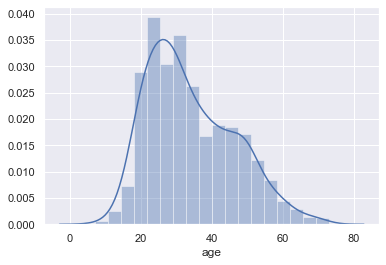

In [9]:
# HINT: use distplot for age and countplot for gender,ratings,occupation.
# HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split()
# as depicted below
# Hint : Use displot without kde for release year or line plot showing year wise count.

sns.distplot(User['age']);


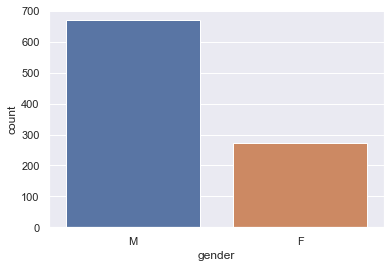

In [10]:
sns.countplot(User['gender']);

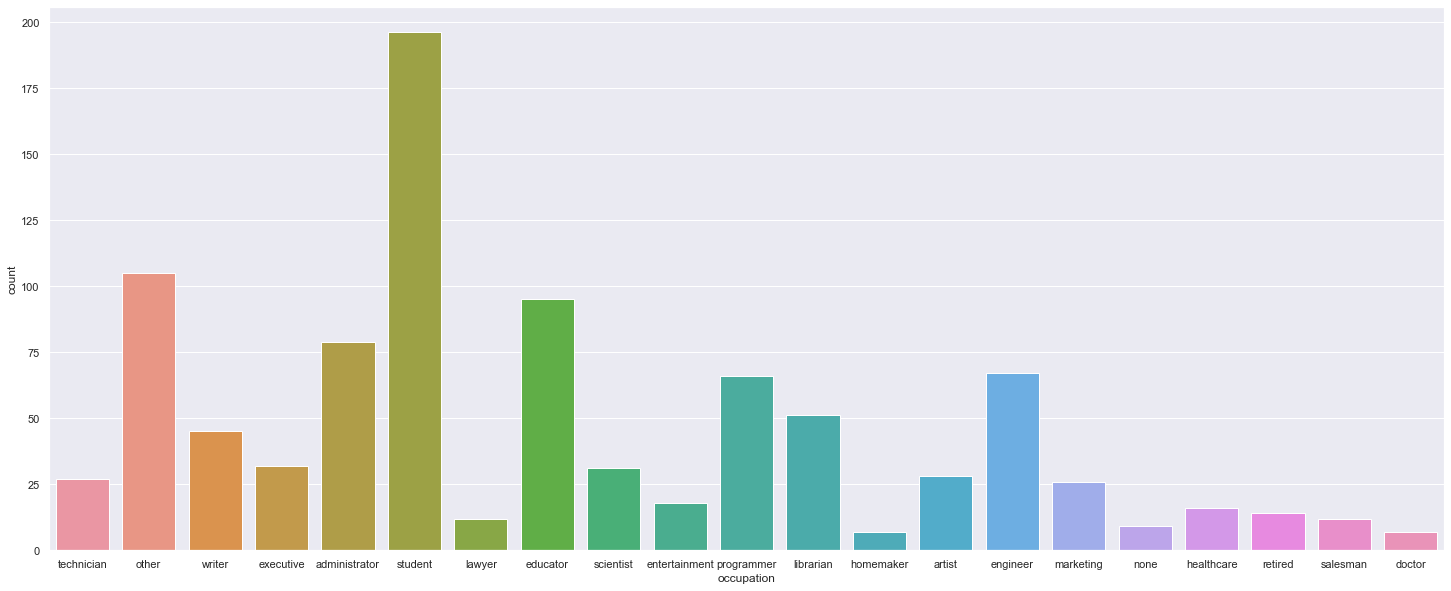

In [11]:
plt.figure(figsize=(25,10))
sns.countplot(User['occupation']);

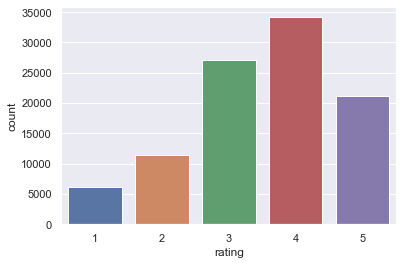

In [12]:
sns.countplot(Data['rating']);

In [ ]:
a = 'My*cat*is*brown'
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])
print(a[-5:])

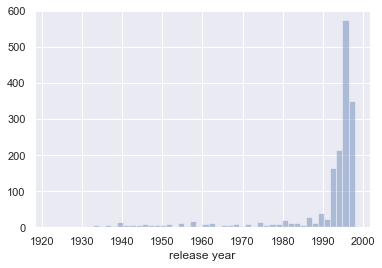

In [13]:
#your answers here

from datetime import datetime

Item['Release DateTime'] = pd.to_datetime(Item['release date'])

Item['release year'] = Item['Release DateTime'].dt.year


#print(Item.info())

sns.distplot(Item['release year'], kde=False);



### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the number of releases in a year as a parameter of popularity of a genre

Hint 1: you need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa.
Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 2: Use groupby on the relevant column and use sum() on the same to find out the nuumber of releases in a year/genre.  

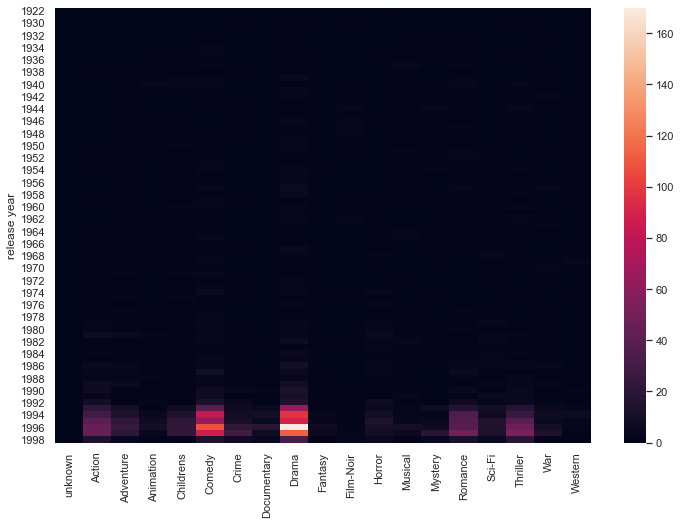

In [14]:
#Your answer here

#Group Data by Realease Year
grouped_data = Item.groupby('release year')
#print(grouped_data)

#Get Sum of Data by Release Year 
Item_Release_Year = grouped_data.sum()

#Remove Moevie ID to get the final Data Frame
Item_Release_Year = Item_Release_Year.drop('movie id',axis=1,inplace=False)

#print(Item_Release_Year)

#sns.distplot(Item_Release_Year['Action']);

plt.figure(figsize=(12,8))
sns.heatmap(Item_Release_Year);


### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hint : 
1. First find the movies that have more than 100 ratings(use merge, groupby and count). Extract the movie titles in a list.
2. Find the average rating of all the movies and sort them in the descending order. You will have to use the .merge() function to reach to a data set through which you can get the names and the average rating.
3. Use isin(list obtained from 1) to filter out the movies which have more than 100 ratings.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [15]:
#your answer here


#Merge Item and Data
Movie_Data = pd.merge(Data,Item,how='inner',on='movie id')
#print(Movie_Data.head(2))

#Get Count of ratings for each movie
Movies_grouped = Movie_Data.groupby('movie id').count()
#print(Movies_grouped.head(5))

#Get Movies with greater than 100 ratings
Movies_grouped1 = Movies_grouped[Movies_grouped['rating'].gt(100)]
#print(Movies_grouped1.head(3))

Movies_G100  = list(Movies_grouped1.index.values)
#print(Movies_G100)
#print('>100', type(Movies_G100))


#Get average rating of each movie
Movies_grouped2 = Movie_Data.groupby('movie id').mean()
#print(Movies_grouped2.head(10))

Item_1 = Item
Item_1['Average rating'] = list(Movies_grouped2['rating'])
#print(Item_1.head(10))

Item_1 = Item_1[Item_1['movie id'].isin(Movies_G100)]

Item_1 = Item_1.sort_values(by='Average rating',ascending=False,inplace=False)
Movies_T25 = Item_1.head(25)

print(Movies_T25[['movie id','movie title','Average rating']])




     movie id                                        movie title  \
406       408                                    Close Shave, A    
316       318                                  Schindler's List    
168       169                               Wrong Trousers, The    
481       483                                        Casablanca    
63         64                         Shawshank Redemption, The    
601       603                                       Rear Window    
11         12                               Usual Suspects, The    
49         50                                         Star Wars    
177       178                                      12 Angry Men    
133       134                                      Citizen Kane    
425       427                             To Kill a Mockingbird    
355       357                   One Flew Over the Cuckoo's Nest    
97         98                         Silence of the Lambs, The    
478       480                                Nor

### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women


1. There is no need to conduct statistical tests around this. Just compare the percentages and comment on the validity of the above statements.

2. you might want ot use the .sum(), .div() function here.
3. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

#### Conclusion:



In [16]:
#Merge Item and Data
Movie_Data = pd.merge(Data,Item,how='outer',on='movie id')

#Merge Movie_Data and User
User_Movie_Data = pd.merge(Movie_Data,User,how='outer',on='user id')
#print(User_Movie_Data.head())

User_Data = User_Movie_Data


User_Movies_grouped = User_Data.groupby('gender').count()
#print(User_Movies_grouped)


User_Movies_grouped1 = User_Data.groupby('gender').sum()
#print(User_Movies_grouped1)


print()
print(User_Movies_grouped1['Drama'])
print()
print(User_Movies_grouped1['Sci-Fi'])
print()
print(User_Movies_grouped1['Romance'])

print()

Drama_User = User_Movies_grouped1['Drama'].divide(User_Movies_grouped['user id'], fill_value=0)
print('Drama rating User Male Vs Female : ', Drama_User)
print()
print('"Men watch more drama than women" is False \n')
print()

SciFi_User = User_Movies_grouped1['Sci-Fi'].divide(User_Movies_grouped['user id'], fill_value=0)
print('Sci-Fi rating User Male Vs Female : ', SciFi_User)
print()
print('"Women watch more Sci-Fi than men" is False \n')
print()

Romance_User = User_Movies_grouped1['Romance'].divide(User_Movies_grouped['user id'], fill_value=0)
print('Romance rating User Male Vs Female : ', Romance_User)
print()
print('"Men watch more Romance than women" is False')
print()






gender
F    11008.0
M    28887.0
Name: Drama, dtype: float64

gender
F     2629.0
M    10101.0
Name: Sci-Fi, dtype: float64

gender
F     5858.0
M    13603.0
Name: Romance, dtype: float64

Drama rating User Male Vs Female :  gender
F    0.427661
M    0.388998
dtype: float64

"Men watch more drama than women" is False 


Sci-Fi rating User Male Vs Female :  gender
F    0.102137
M    0.136022
dtype: float64

"Women watch more Sci-Fi than men" is False 


Romance rating User Male Vs Female :  gender
F    0.227584
M    0.183181
dtype: float64

"Men watch more Romance than women" is False

